# Machine learning avec les modules Python tensorflow2/keras 

## Entraînement / exploitation d'un réseau de neurones dense pour la reconnaissance de chiffres manuscrits

## La banque d'images MNIST

Dans ce TP nous utilisons les images labelisées de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST contient 70000 images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice 28 $\times$ 28 de nombres `uint8` (entiers positifs dans l'intervalle [0 ; 255]).<br>
Les 70000 images du MNIST sont regoupées en un jeu de **60000 images d'apprentissage** et un jeu de **10000 images de test**.

<div class="alert alert-block alert-danger">
L'évaluation des performances d'un réseau entraîné doit se faire sur un jeu de données différent du jeu d'entraînement : c'est pour cela que la banque MNIST propose 10000 images de test différentes des 60000 images d'entraînement.
</div>
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="img/MNIST_digits_sample.png" width="500"><br>
[crédit image : JLC]
</p>

# A/ Rappels des principaux concepts...

## Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\sum_i \omega_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/nn_1.png" width="600" ><br>
    [crédit image : JLC]
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ permettant de décaler le point où la fonction d'activation ets calculée.

## Fonction d'activation

Principaux rôles :

- introduire dans le neurone un comportement **non linéaire** (comme des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone, par exemple dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonctions d'activations couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/activationFunctions.png" width="950"><br>
    [crédit image : JLC]
</p>

# B/ Structure du réseau dense à construire 
Dans ce premier TP,  nous allons construire un **réseau dense**, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels des image MNIST 28 $\times$ 28 mis sous forme d'un vecteur de 784 nombres `float`),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux problèmes de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs $x_i$ des pixels de l'image plus le biais (l'entrée '-1'). 
- $\leadsto$ Il y a donc 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté au biais.
- $\leadsto$ on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

### Fonction d'activation softmax

La fonction `softmax` calcule pour chaque neurone de sortie $k$ la valeur $\displaystyle{Y_k = \frac{e^{y_k}}{\sum_i{e^{y_i}}}}$.


`softmax` associe ainsi à chacune des sorties $y_k$ une valeur $Y_k \in [0, 1]$ qui peut être interprétée comme la probablité de la sortie $k$ : on obtient une valeur proche de 1 pour le neurone fournissant la valeur $y_i$ la plus grande, et quasiment 0 pour tous les autres.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/softmax.png" width="400"><br>
    [crédit image : JLC]
</p>


### Catégorisation des labels (*one-hot coding*)

Les labels des images sont des entiers entre 0 et 9 désignant les chiffres de '0' à '9' alors que la sortie du réseau est un ensemble de 10 valeurs `float` comprises entre 0 et 1 (un vecteur de 10 `float`).<br>
Pour faciliter la comparaison entre le label associé à une image et la sortie du réseau calculée pour cette image, on utilise la catégorisation *one-hot coding* : chaque classe (label) est associée à un vecteur $Y'$ comportant autant d'éléments que de classes à reconnaître : les éléments du vecteur sont tous nuls sauf un, permettant d'identifier de façon unique chacune des classes.<br>

Pour notre exemple des 10 classes correspondant aux labels '0' à '9' :
- le label `0` correspond au vecteur $Y'_1 = [1 0 0 0 0 0 0 0 0 0]$.
- le label `3` correspond au vecteur $Y'_4 = [0 0 0 1 0 0 0 0 0 0]$.
- le label `9` correspond au vecteur $Y'_9 = [0 0 0 0 0 0 0 0 0 1]$.

### Calcul de l'erreur

Pendant la phase d'entraînement du réseau, chaque image en entrée du réseau donne un vecteur de probabilités en sortie (réponse calculée par le réseau) qui peut doit être comparé à la représentation *hot-one* du label associé à l'image d'entrée.

On peut utiliser l'erreur *cross entropy*  ($-\sum_i{Y'_i.\log{Y_i}}$) qui mesure l'écart entre la représentation *one-hot* du label et la réponse du réseau :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/CrossEntropy.png" width=600><br>
    [crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner]
</p>


### Backpropagation error

L'algorithme de **retropropagation de l'erreur** permet de modifier les poids des couches du réseau pour minimiser l'erreur entre valeur attendue et valeur prédite par le réseau. <br>
Au fur et à mesure des apprentissages successifs, les poids du réseau convergent vers un état qui constitue le réseau entraîné.

### Reproductibilité des générateurs pseudo-aléatoires

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire ; lorsqu'on invoque plusieurs fois de suite des générateurs pseudo-aléatoires (comme `numpy.random.rand`...) on constate qu'à chaque invocation, on obtient une suite de valeurs aléatoires différentes :

In [1]:
import numpy as np
print(np.random.rand(5))

[0.11916142 0.39660683 0.91347907 0.25299202 0.8632346 ]


In [2]:
print(np.random.rand(5))

[0.16028168 0.93903766 0.57416003 0.29836126 0.33985874]


Ce comportement peut être source de problèmes pour l'étude des performances d'un réseau entraîné en fonction des paramètres de construction ou d'entraînement : à chaque fois qu'on exécute la cellule ou le notebook avec de nouvelles valeurs des paramètres, on obtient un état initial du réseau différent, conduisant à un état du réseau entraîné différent... ce qui peut gêner les comparaisons.

Pour éviter ce phénomène, on peut fixer la **graine** (*seed*) des générateurs aléatoires de façon à produire des séquences de nombres aléatoires **reproductibles**.<br>

Les cellules suivantes illustrent le mécanisme :

In [3]:
SEED = 43

In [4]:
np.random.seed(SEED)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [5]:
np.random.seed(SEED)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

Pour appliquer ce mécanisme aux calculs faits avec tensorflow, on pourra utiliser la fonction `set_seed` (cf page [tf.random.set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)) :
**`tf.random.set_seed(SEED)`**

# C/ Travail à faire

## Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
L'état de l'art actuel des projets de machine learning sous Python préconise l'utilisation d'un <span style="font-weight:bold;">Environnement Virtuel Python</span> (EVP) qui permet de maîtriser pour chaque projet les versions des modules Python "sensibles" (comme tensorflow par exemple).

Dans le cas d'un démarrage de l'ordinateur avec une clef USB Ubuntu, on peut considérer que la clef fournit un environnement Python dédié, à condition de ne pas faire de mises à jour des paquets Python avec <span style="font-style:italic">pip install...</span>
    
Dans le cas contraire, la <A href="https://learn.ros4.pro/fr/faq/Python/">FAQ Python</A> explique comment créer et utiliser un EVP pour utiliser **numpy** et **tensorflow2** avec la bibliothèque optimisée <A href="https://software.intel.com/content/www/us/en/develop/tools/oneapi/components/onemkl.html">MKL</A>.
</span>
</div>

### Documentation tensorflow/keras

Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans tensorflow2. <br>
La documentation du module **tf.keras** à consulter pour ce TP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

Versions des modules Python validées pour ce TP sous Ubuntu 20 / Python3.8.5 :
- tensorflow 2.4.0 incluant tensorflow.keras 2.4.0
- OpenCV 4.4.0

In [6]:
import tensorflow as tf
from tensorflow import keras
import sys, cv2
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.5
tensorflow: 2.4.0 incluant keras 2.4.0
OpenCV    : 4.4.0


Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1 - Récupération des images MNIST

Consulter la documentation de la fonction `load_data` sur la page [tf.keras.datasets.mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) puis compléter la cellule ci-dessous pour charger les données du MNIST en nommant les données renvoyées :<br>
- `im_train`, `im_test` pour les images d'entraînement et de test,
- `lab_train`, `lab_test` pour les labels des données d'entraînement et de test.

In [8]:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

La cellule ci-dessous affiche les attributs `shape` et `dtype` des tableaux numpy obtenus : les valeurs sont-elles cohérentes ? pourquoi ?

In [9]:
print("im_train -> shape:", im_train.shape, ", dtype:", im_train.dtype,)
print("im_test  -> shape:", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_train-> shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("lab_test -> shape:", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train -> shape: (60000, 28, 28) , dtype: uint8
im_test  -> shape: (10000, 28, 28) , dtype: uint8
lab_train-> shape: (60000,) , dtype: uint8
lab_test -> shape: (10000,) , dtype: uint8


### Visualisation des images et des étiquettes :

Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 601-ème image du tableau `im_train`.<br>
Indications :
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image
- utiliser l'option `cmap='gray'` de `imshow` pour l'affichage en ton de gris
- enlever les graduations en X et Y (par exemple avec `plt.xticks([]); plt.yticks([])`).

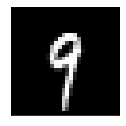

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[600], cmap='gray')
plt.xticks([]); plt.yticks([]);

Vérifier que le label MNIST associée à `image_train[600]` correspond bien à ce qu'on voir sur l'image....

In [11]:
lab_train[600] == 9

True

Écrire une fonction `plot_images` d'arguments `images, r, L, C` qui affiche les images du tableau `images` (tableau de matrices) dans une grille d'images de `L` lignes et `C` colonnes  en commençant avec l'image de rang `r`. La taille de la figure totale (option`figsize` de `plt.figure`) sera fixée pour que chaque image de la grille soit de taille `(1,1)`.<br>
*Indications* : utiliser `plt.subplot(L,C,n)` pour positionner la nième image dans la grille des L x C images.

In [12]:
def plot_images(images, r,L,C):
    plt.figure(figsize=(C,L))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(images[r+i], cmap='gray')
        plt.xticks([]); plt.yticks([])

Faire afficher les images d'entraînement à partir de la 601 ème dans une grille de 4 x 6 :

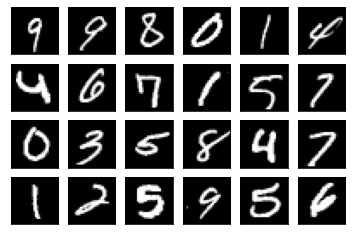

In [13]:
plot_images(im_train, 600, 4, 6)

**Bonus** : trier les images `im_train` pour faire afficher le même type d'image que celle figurant en tout début du notebook (des 0,1...9 en noir sur fond blanc sur 16 colonnes)...

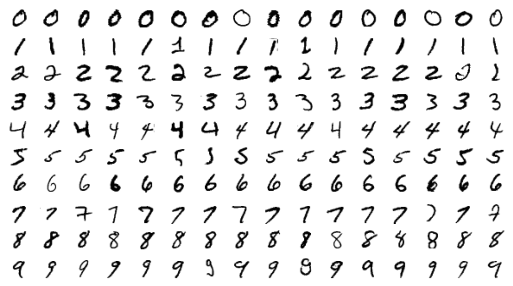

In [14]:
import matplotlib.pyplot as plt

data = []
for i in range(10):
    indexes = np.where(lab_train == i) # indices des labels égaux à i
    i_data = im_train[indexes][:16]    # tanleau des images correspondates
    data.append(i_data)

plt.figure(figsize=(9,5))
L, C = len(data), len(data[0])
for row, digits in enumerate(data):
    for col, digit in enumerate(digits):
        plt.subplot(L, C , row*C + col + 1)
        plt.imshow(255-digit, cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.box(False)
plt.show()        

### Pré-traitement des données MNIST

Pour adapter les données à la couche d'entrée du réseau de neurones, on transforme les matrice d'entiers `uint8` représentant les images 28x28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1$.

### Transformation des matrices d'entrée en vecteurs normalisés :

Pour paramétrer les traitements, on récupère à l'aide des tableaux `im_train` et `im_test` :
- le nombre d'images d'entraînement (`nb_im_train` et `nb_im_test`)
- le nombre de pixels des images (`nb_pixel`)

In [15]:
# compléter la cellule...
nb_im_train = im_train.shape[0]
nb_im_test  = im_test.shape[0]
nb_pixel    = im_train[0].size        

Vérification :

In [16]:
print(f"{nb_im_train} images d'entraînement et {nb_im_test} images de test")
print(f"{nb_pixel} pixels dans chaque image")

60000 images d'entraînement et 10000 images de test
784 pixels dans chaque image


Définir maintenant les tableaux `x_train` et `y_train` contenant les matrices des tableaux `im_train` et `im_test` *mises à plat* sous forme de vecteurs normalisés (valeurs comprises entre 0 et 1).<br>
*indications* : utiliser la méthode `reshape` des tableaux ndarray de numpy et les valeurs des paramètres `nb_im_train`, `nb_im_test` et `nb_pixel` calulés précédemment :

In [17]:
x_train = im_train.reshape((nb_im_train, nb_pixel))/255
x_test  = im_test.reshape((nb_im_test, nb_pixel))/255

Vérifier visuellement que les dimensions des tableaux `x_train` et `x_test` sont bien celles attendues :

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Vérifier que les valeurs min et max des tableaux `x_train` et `x_test` sont bien celles attendues :

In [19]:
x_train.min(), x_train.max(), x_test.min(), x_test.max()

(0.0, 1.0, 0.0, 1.0)

###  Codage *one-hot*  des labels:

Consulter la documentation de la fonction `to_categorical` sur la page [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)  et en déduire comment définir les tableaux `y_train` et `y_test` contenant la version encodée *hot-one* des tableaux `lab_train` et `lab_test` :

In [20]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' des labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Vérifier visuellement les 10 premières valeurs des tableaux `lab_train` et `y_train` :

In [21]:
lab_train[:10], y_train[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

## 3 - Construction du réseau de neurones

On va maintenant construire un réseau de neurones **séquentiel** en **4 lignes** Python à l'aide du module **keras**.

Après lecture de la page [guide/keras/sequential_model](https://www.tensorflow.org/guide/keras/sequential_model), construire le réseau  de façon incrémentale avec la méthode `add` dans la cellule ci-dessous en suivant la démarche proposée :
- 1/ Créer l'objet `model` instance de la classe `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).
- 2/ Les couches du réseau sont des objets de type `Dense` ajoutés à `model` avec la méthode `add`. (cf [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) <br>
Chaque objet `Dense` est construit avec les arguments propres à sa couche :
    - couche 1 : `Dense(nb_pixel, input_shape=nb_pixel, activation='relu')`
        - `nb_pixels` neurones dans la couche,
        - `input_shape=(nb_pixel,)` : donne le nombre d'entrées (noter le tuple `(nb_pixel,)`)
        - `activation='relu'` affecte la fonction d'activation *relu* à tous les neurones de la couche (cf  [tf.keras.activation.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)).
    - couche 2 : `Dense(nb_classes, activation='softmax')`
        - `nb_classes` neurones dans le couche,
        - `activation='softmax'` affecte la fontion d'activation *softmax* à tous les neurones de la couche (cf [tf.keras.activation.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax))
        - le nombre d'entrées est déduit automatiquement (nombre de neurones de la couche précédente)
- 3/ Une fois construit, le réseau doit être compilé (au sens de tensorflow) avec la méthdoe `compile` avec les arguments :
    - `loss='categorical_crossentropy'` : choix de la fonction d'erreur (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
    - `optimizer='adam'` : choix de l'optimiseur Adam (cf page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam))
    - `metrics=['accuracy']` pour obtenir les données permettant de tracer les courbes de performance.

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

nb_classe = 10
tf.random.set_seed(SEED)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixel, input_shape=(nb_pixel,), activation='relu', name='C1'))
model.add(Dense(nb_classe, activation='softmax', name='C2'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : noter les valeurs des paramètres (les poids du reseau inconnus à trouver par entraînement)... 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Dense)                   (None, 784)               615440    
_________________________________________________________________
C2 (Dense)                   (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Pourquoi y-a-t-il des `None` dans la colonne "Output Shape"  ?

Retrouver le nombre total de paramètres avec une formule simple ...

In [24]:
785*784+785*10

623290

La fonction `plot_model` permet de dessiner la structure du réseau (voir la page [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)).<br>
Faire tracer la structure du modèle en ajoutant l'option `show_shapes=True` à l'appel de `plot_model` :

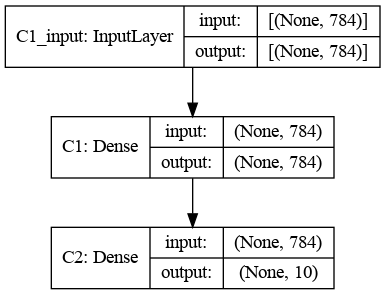

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

*Remarque* : en utilisant l'argument nommé `name` dans la fonction `Dense`, on peut donner des noms personnalisés aux couches, qui apparaîtront dans les sorties de `summary` et de `plot_model`.

### Sauvegarde de l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `save_weights` de la classe `Sequential`. <br>
Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [26]:
import os

# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.isdir("weights"): os.mkdir("weights")

# sauvegarde des poinds du réseau initial:
key = 'model1_initial'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/model1_initial.data-00000-of-00001
weights/model1_initial.index


Remarque : la méthode `save_weights` utilise la partie `key` du chemin passé en argument pour préfixer les fichiers créés.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `load_weights` de la classe `Sequential`, il suffira de donner la même information pour retrouver les bons fichiers.

## 4 - Entraînement du réseau

Consulter au besoin la documentation de la méthode `fit` sur la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Compléter la cellule ci-dessous pour entraîner le réseau avec la méthode `fit` de l'objet `model` en utilisant les arguments :
- `x_train` : les 60000 images mises à plat et normalisées
- `y_train` : les 60000 labels encodés *one-hot*.
- `epochs=15` : faire 15 fois l'entraînement complet.
- `batch_size=128` : découper le jeu des données d'entrée (les 60000 images) en "lots" (*batch*) de taille `batch_size` (ici en lots de 128 images).<br>
La mise à jour des poids du réseau est faite au bout de `batch_size` échantillons d'entrée.<br>
La valeur de `batch_size` (par défaut : 32) est un paramètre qui influe sur la qualité de l'apprentissage mais aussi sur son empreinte mémoire : on peut essayer différentes (64, 128, 256 ...) et observer comment évolue la qualité de l'entraînement).



In [27]:
# au cas on on exécute plusieurs fois cette cellule, on peut ré-initialiser 
# le réseau à son état initial si on veut comparer les entraînements...
key = 'model1_initial'
model.load_weights('weights/'+key)  

hist = model.fit(x_train, y_train, 
                 epochs=15, 
                 batch_size=128)

Epoch 1/15
469/469 [==============================] - 4s 7ms/step - loss: 0.4285 - accuracy: 0.8766
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1028 - accuracy: 0.9704
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0627 - accuracy: 0.9814
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0431 - accuracy: 0.9869
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0311 - accuracy: 0.9911
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0220 - accuracy: 0.9939
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0153 - accuracy: 0.9959
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0113 - accuracy: 0.9971
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0062 - accuracy: 0.9986

L'objet `hist` retourné par la méthode `fit` possède un attribut `history` de type `dict` dont les clefs `'loss'` et `'accuracy'` sont associées aux information correspondantes obtenues après chaque 'époque ' (*epoch*) :

In [28]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [29]:
hist.history['loss']

[0.24685239791870117,
 0.0977887436747551,
 0.06121019273996353,
 0.04477173835039139,
 0.030125463381409645,
 0.022115763276815414,
 0.01696634292602539,
 0.012579032219946384,
 0.010817741975188255,
 0.0071329823695123196,
 0.008060520514845848,
 0.007956854067742825,
 0.005899069365113974,
 0.0027975542470812798,
 0.00426615122705698]

In [30]:
hist.history['accuracy']

[0.9291999936103821,
 0.9707333445549011,
 0.9817333221435547,
 0.9865000247955322,
 0.9912333488464355,
 0.9936500191688538,
 0.9953166842460632,
 0.996749997138977,
 0.9971333146095276,
 0.9982500076293945,
 0.9975500106811523,
 0.997866690158844,
 0.9983333349227905,
 0.9994833469390869,
 0.9988499879837036]

### Tracé des courbes `loss` et `accuracy` 

La fonction `plot_loss_accuracy` du module `utils.tools` (présent dans le répertoire du notebook) permet de tracer les courbes "fonction d'erreur et de "précision" sur la base des données stockées dans `hist`.<br> Importer et utiliser la fonction`plot_loss_accuracy` pour faire tracer ces courbes :

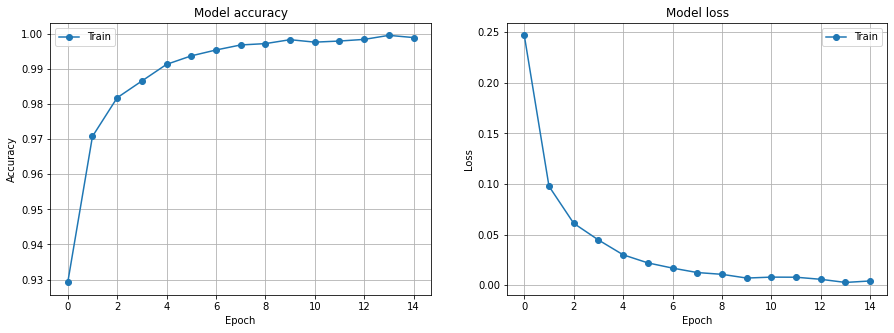

In [31]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### À propos de la reproductibilité de l'entraînement...

la reproductibilité parfaite d'un entraînement de réseau de neurones est difficile à atteindre avec tensorflow....

Observez les résultats des cellules suivantes :


Dans ce premier essai, le réseau est initialisé une fois, puis à chaque tour de boucle il est entraîné sur la base de son état au tour de boule précédent... `loss` et `accuracy` évoluent à chaque tour de boucle.<br>
$\leadsto$ c'est comme si on avait fait un `model.fit(x_train, y_train, epochs=10, batch_size=128)`

In [32]:
# recharger l'état initial du réseau:
key = 'model1_initial'
model.load_weights('weights/'+key) 

for _ in range(10):
    hist = model.fit(x_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 3s 7ms/step - loss: 0.0042 - accuracy: 0.9993


Dans la cellule suivante, on réinitialise bien l'état initial du réseau **avant chaque lancement de `fit`** : c'est mieux, mais ce n'est pas encore parfait...

In [33]:
for _ in range(10):
    # recharger l'état initial du réseau:
    key = 'model1_initial'
    model.load_weights('weights/'+key) 

    hist = model.fit(x_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 3s 7ms/step - loss: 0.2257 - accuracy: 0.9330


Et dans cet essai, on ré-initialise la graine tensorflow avec `tf.random.set_seed(SEED)` avant chaque invocation de `fit` : ce n'est toujours pas exactement les mêmes valeurs `loss` et `accuracy` que l'on observe, mais c'en est très proche...

In [34]:
for _ in range(10):
    # recharger l'état initial du réseau:
    key = 'model1_initial'
    model.load_weights('weights/'+key) 
    tf.random.set_seed(SEED)
    
    hist = model.fit(x_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 3s 7ms/step - loss: 0.2268 - accuracy: 0.9329


## 5 - Entraînement du réseau avec test à chaque `epoch`

Pour avoir un indicateur réaliste de la qualité du réseau entraîné on peut tester à chaque `epoch` la précison des prédictions du réseau entraîné en utilisant les données de test : il suffit de passer l'agument `validation_data` à la méthode `fit`, en lui affectant le tuple des données de test `(x_test, y_test)`

In [35]:
# recharger l'état initial du réseau:
key = 'model1_initial'
model.load_weights('weights/'+key) 
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), 
                 epochs=15, 
                 batch_size=128)

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2272 - accuracy: 0.9328 - val_loss: 0.1151 - val_accuracy: 0.9641
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0889 - accuracy: 0.9734 - val_loss: 0.0814 - val_accuracy: 0.9745
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.0705 - val_accuracy: 0.9771
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.0650 - val_accuracy: 0.9791
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0202 - accuracy: 0.9948 - val_loss: 0.0590 - val_accuracy: 0.9810
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.0575 - val_accuracy: 0.9845
Epoch

On a cette fois dans `hist.history` non seulement les clefs `loss` et `accuracy` mais aussi `val_loss` et `val_accuracy` calculés avec les données de test :

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Faire afficher ces courbes avec la fonction `plot_loss_accuracy` :

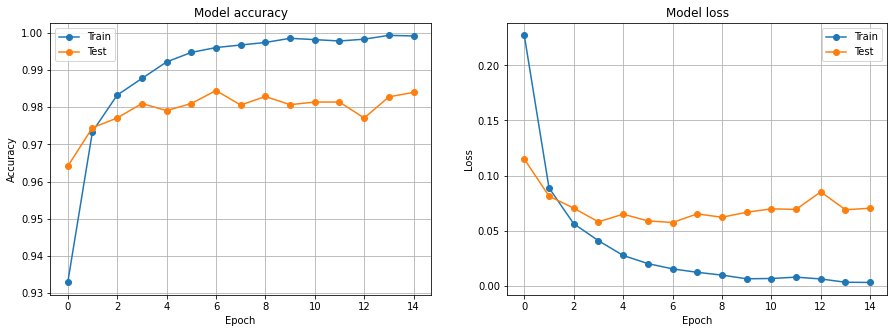

In [37]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

On voit que la précision calculée avec les données de test tend vers une limite voisine de 98%. <br>
On pourrait penser qu'augmenter la valeur de `epochs` permet d'améliorer la précision du réseau... mais on court le risque de sur-entraînner le réseau (*over-fit*).

### Arrêter automatiquement l'entraînement avant *over-fit*

Keras propose des outils pour arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre. On peut ainsi définir une liste de fonctions *callback* que l'on peut passer en argument à la focntion `fit` avec l'agument nommé  `callbacks` :

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,              # accepter que 'val_accuracy' diminue 2 fois de suite
                  verbose=1)
]

# recharger l'état initial du réseau:
key = 'model1_initial'
model.load_weights('weights/'+key) 
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1893 - accuracy: 0.9431 - val_loss: 0.0953 - val_accuracy: 0.9697
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - accuracy: 0.9790 - val_loss: 0.0705 - val_accuracy: 0.9776
Epoch 3/15
469/469 [==============================] - 4s 7ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.0641 - val_accuracy: 0.9793
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.0602 - val_accuracy: 0.9815
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0137 - accuracy: 0.9965 - val_loss: 0.0584 - val_accuracy: 0.9826
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.0567 - val_accuracy: 0.9822
Epoch 

Tracer les courbes `loss` et `accuracy` :

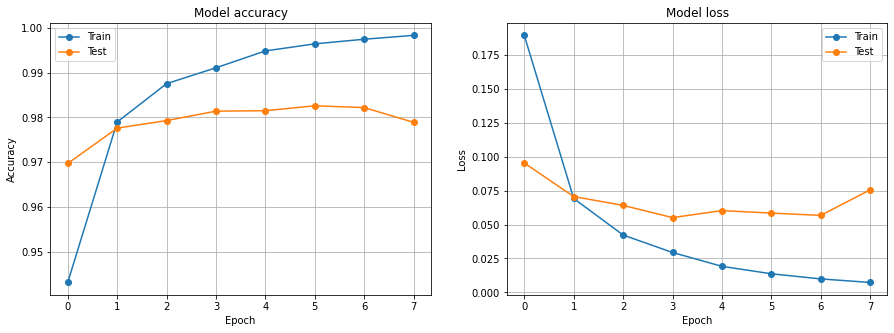

In [39]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### Sauvegarder les poids du  réseau entraîné

La méthode `save_weights` de la classe `Sequential`permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [40]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("weights"): os.mkdir("weights")

# sauvegarde des poids du réseau entrainé:
key = 'model1_trained'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/model1_trained.index
weights/model1_trained.data-00000-of-00001


### Sauvegarder la structure du réseau et ses poids

La méthode `save` de la classe `Sequential` permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />
$\leadsto$ Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [41]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("models"): os.mkdir("models")

# sauvegarder structure réseau + poids :
key = 'model1'
model.save('models/'+key) 

# afficher les fichiers créés:
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith(key)]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/model1/assets
models/model1


## 6/ Exploitation du réseau avec le jeu de test

La méthode `predict` de l'objet `model` permet de calculer la prédiction du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict`, et comment exploiter la représentation  *one-hot* renvoyée par `fit` en utilisant la méthode `argmax` des tableaux de numpy :

sortie one-hot du réseau pour l'image de rang 100 :
[5.1318652e-06 2.3050013e-09 2.0265334e-07 3.5029752e-09 4.3611387e-08
 4.1979438e-06 9.9998748e-01 9.6796143e-08 2.8330176e-06 1.5062573e-09]

sortie one-hot réseau arrondie à 1 chiffre : [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
rep[0].argmax() donne : 6

La bonne réponse est 6 soit en 'hot-one' : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


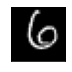

In [42]:
i = 100   # numéro image de test
rep = model.predict(x_test[i:i+1]) # Attention: x doit être un tableau de matrices...
                                   # => x[i] ne convient pas !

print(f"sortie one-hot du réseau pour l'image de rang {i} :\n{rep[0]}")

# limiter l'affichage des composantes des tableaux numpy à 1 chiffre :    
with np.printoptions(formatter={'float':'{:.1f}'.format}):    
    print(f"\nsortie one-hot réseau arrondie à 1 chiffre : {rep[0]}")
    
print(f"rep[0].argmax() donne : {rep[0].argmax()}")

print(f"\nLa bonne réponse est {lab_test[i]} soit en 'one-hot' : {y_test[i]}")

plot_images(im_test,i,1,1)

#### Utilité de la méthode `ndarray.argmax` de numpy pour décoder le tableau de vecteurs *one-hot* renvoyé par la méthode `predict`

Quand on calcule la prédiction du réseau `model` avec les données de test par exemple, on obtient un résultat qui est un tableau de vecteurs codés *one-hot*, comme le détaille la cellue suivante :

In [43]:
results = model.predict(x_test)

print("forme du tableau 'results':", results.shape)
print("allure des vecteurs du tableau 'result', par exemple :")
with np.printoptions(formatter={'float':'{:.4f}'.format}): 
    print("results[0]  :", results[0])
    print("results[-1] :", results[-1])

forme du tableau 'results': (10000, 10)
allure des vecteurs du tableau 'result', par exemple :
results[0]  : [0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.9999 0.0000 0.0000]
results[-1] : [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000]


En écrivant `results.argmax(axe=-1)`, on obtient le tableau des `argmax` de chaque vecteur -> c'est directement le tableau des chiffres reconnus par le réseau :

In [44]:
chiffres_reconnus = results.argmax(axis=-1)

print("chiffres_reconnus -> shape:", chiffres_reconnus.shape, ", dtype:", chiffres_reconnus.dtype)
print(f"contenu de chiffres_reconnus : {chiffres_reconnus}")

chiffres_reconnus -> shape: (10000,) , dtype: int64
contenu de chiffres_reconnus : [7 2 1 ... 4 5 6]


En déduire le taux de réussite du réseau entrainé en calculant la prédiction du réseau sur les données de test `x_test` et en les comparant aux labels `lab_test` :

In [45]:
results = model.predict(x_test)
chiffres_reconnus = results.argmax(axis=-1)

success = 0
for i, res in enumerate(chiffres_reconnus):
    success += (res == lab_test[i])
print(f"taux de réussite : {success/len(x_test)*100:.2f} %")

taux de réussite : 97.89 %


###  Afficher la matrice de confusion

La cellule suivante définie la fonction `show_cm_mnist` qui affiche la **matrice de confusion**.

La matrice de confusion permet de visualiser :
- sur la diagonale : les bonnes réponses du réseau, avec dans chaque case le nombre de bonnes réponses
- hors diagonale : les erreurs du réseau, avec dans chaque case la fréquence d'apparition de l'erreur.

In [46]:
import pandas as pd
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

def show_cm_mnist(target, results, classes):
    # target : the actual labels
    # results : the labels computed by the trained network (one-hot format)
    # classes : list of possible label values
    predicted = np.argmax(results, axis=-1) # tableau d'entiers entre 0 et 9 
    cm = confusion_matrix(target, predicted)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(11,9))
    heatmap(df_cm, annot=True);

Faire afficher la matrice de confusion en lui passant les labels attendus `lab_test` et les labels calculés par le model :

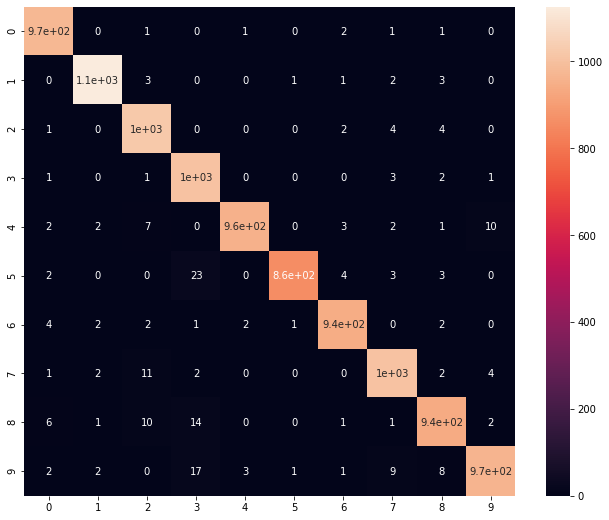

In [47]:
show_cm_mnist(lab_test, results, range(nb_classe))

# D/ Bonus

 ## Réseau profond : augmenter le nombre de couches cachées 
 
 On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu
- couche cachée 2 : 200 neurones, fonction d'activation `relu`    
- couche cachée 3 : 100 neurones, fonction d'activation `relu`   
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

Écrire une fonction paramétrée `build_nn` selon ces spécifications :
- Construire un réseau de neurones dense dédié à la reconnaissance des chiffres MNIST avec un nombre de neurones par couche paramétré, sauf pour la dernière couche dont le nombre de neurones est fixé par `nb_classe`.
- Entraîner le réseau avec test à la fin de chaque `epoch` et arrêt automatique basé sur la surveillance de `val_accuracy` .
- Afficher les courbes 'Model Loss' et 'Model accuracy' du réseau entraîné.
- Afficher la matrice de confusion.

Par exemple, pour créer, entraîner et tester le réseau profond suggéré ci-dessus, on pourrait écrire :<br>

    data = (x_train, y_train, x_test, y_test)
    tf.random.set_seed(SEED)
    my_model1 = build_mn((784, 200, 100), nb_pixel, nb_classe, data, batch_size=128)

In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

from utils.tools import plot_loss_accuracy
from utils.tools import show_cm_mnist

def build_nn(layers, nb_pixel, nb_classe, data, epoch=15, batch_size=64):

    x_train, y_train, x_test, y_test = data
        
    model = Sequential()
    model.add(keras.Input(shape=(nb_pixel,)))
    for nb_neurone in layers:
        model.add(Dense(nb_neurone, activation='relu'))
    model.add(Dense(nb_classe, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    tf.keras.utils.plot_model(model, show_shapes=True)
    
    callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,       # accepter que 'val_accuracy' diminue 2 fois de suite
                  verbose=1)
    ]

    hist = model.fit(x_train, y_train, 
                     validation_data=(x_test, y_test), 
                     epochs=epoch, 
                     batch_size=batch_size,
                     callbacks=callbacks_list)
    
    plot_loss_accuracy(hist)
    
    show_cm_mnist(lab_test, model.predict(x_test), range(nb_classe))
    
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 793,550
Trainable params: 793,550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.4099 - accuracy: 0.8812 - val_loss: 0.1090 - val_accuracy: 0.9676
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0844 - accuracy: 0.9731 - 

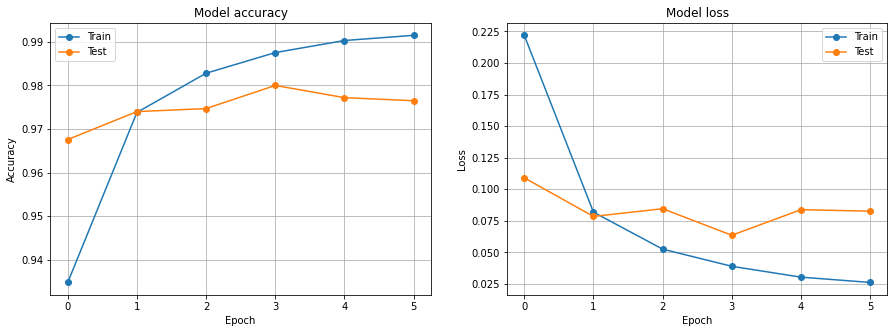

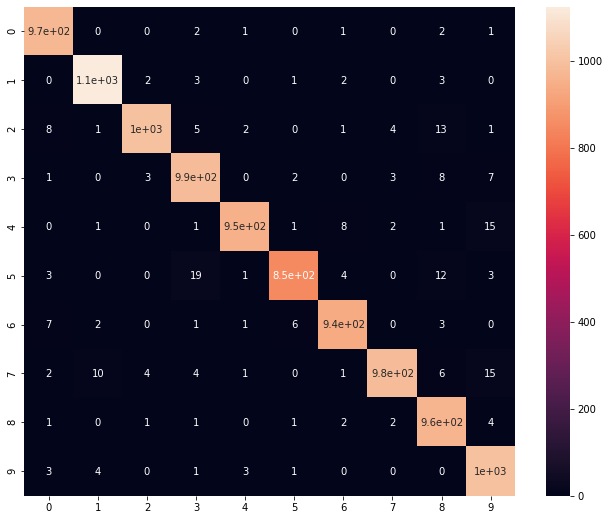

In [49]:
data = (x_train, y_train, x_test, y_test)
tf.random.set_seed(SEED)

my_model1 = build_nn((784,200,100), nb_pixel, nb_classe, data, batch_size=128)

Quel est l'impact de l'augmentation du nombre de couches du réseau ?<br>

## Faire reconnaître des images originales à un réseau entraîné avec les images MNIST

Plusieurs possibilités :
- utiliser des images crées pour l'occasion... 
- utiliser les images toutes prêtes du répertoire `chiffres`.

Si tu crées tes propres images de chiffres écrits à la main, il faut :
- les mettre au format MNIST (20x28 pixels en ton de gris, chiffre centré dans l'image) 
- les placer dans un répertoire spécifique ,
- affecter ce nom de ce répertoire à `images_dir` dans la cellule ci-dessous :

In [1]:
import os

# changer le nom du répertoire au besoin :
images_dir = "chiffres"

images = [os.path.join(images_dir,f) for f in os.listdir(images_dir) if f.endswith(".png")]
images.sort()

print(f"Images du dossier <{images_dir}> à reconnaître :")
for im in images: print(im)

Images du dossier <chiffres> à reconnaître :
chiffres/0.png
chiffres/1.png
chiffres/2.png
chiffres/3.png
chiffres/4.png
chiffres/5.png
chiffres/6.png
chiffres/7.png
chiffres/8.png
chiffres/9.png


### Lecture des fichiers image avec openCV

Les images doivent être convertie en image en ton de gris de 28 x 28 pixels pour pouvoir être traitées par le réseau entraîné sur les images MNIST.

Plusieurs fonctions du module OpenCV pourront être utilisées :
- `cv2.imread(file_name)` : pour lire un fichier image aux formats standards (PNG, JPG,...)
- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` : pour convertir le tableau `img` renvoyé par `cv2.imread` en tons de gris
- `cv2.resize` : pour retailler l'image.

La cellule ci-dessous montre un exemple de lecture et traitement avec OpenCV des images du dossier `chiffres` qui sont déjà au format 28 x 28 pixe :

In [51]:
import cv2

my_images = []
for image_path in images:
    img = cv2.imread(image_path)                    # lecture fichier image
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # conversion en tons de gris
    my_images.append(img_gray)

Visualisation des images lues :

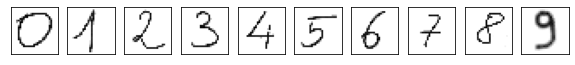

In [52]:
plot_images(my_images, 0, 1, 10)

Inversion des images pour avoir des chiffres doivent être en blanc sur fond noir :

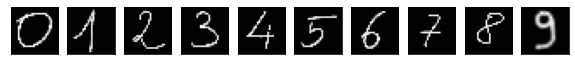

In [53]:
my_images = [255 - im for im in my_images]
plot_images(my_images, 0, 1, 10)

On peut maintenant :
- transformer des matrices 28x28 en vecteurs de float normalisés,
- calculer le prédiction du réseau entaîné de votre choix (`model` ou `my_model1` ou autre...) avec les images perso en entrée,
- faire afficher la précision obtenue et la matric de confusion.

In [54]:
my_images = np.array(my_images)

nb_images = my_images.shape[0]
nb_pixel  = my_images[0].size

# mise 'à plat' des matrices sous forme de vecteurs de floats normalisés :
my_x = my_images.reshape(nb_images, nb_pixel)/255.

Prédiction du réseau `model` entrainé, avec les images perso :

[0 1 2 3 4 5 2 2 8 3]


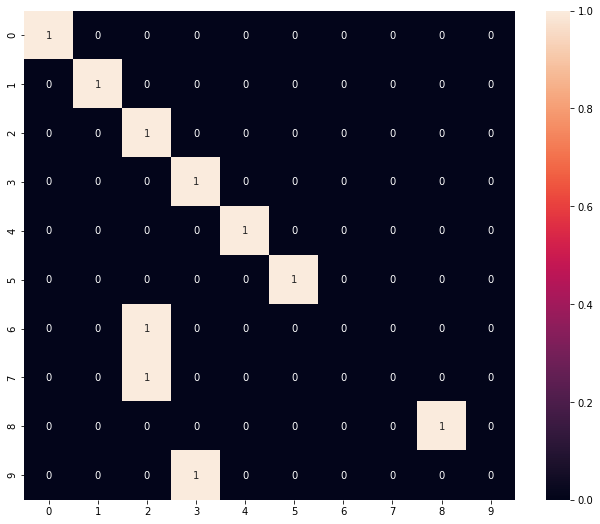

In [55]:
my_results = model.predict(my_x)
print(my_results.argmax(axis=-1))
target    = np.array([0,1,2,3,4,5,6,7,8,9])
show_cm_mnist(target, my_results, range(10))

Prédiction du réseau `my_model1` entrainé, avec les images perso :

[0 1 2 3 4 5 6 1 8 9]


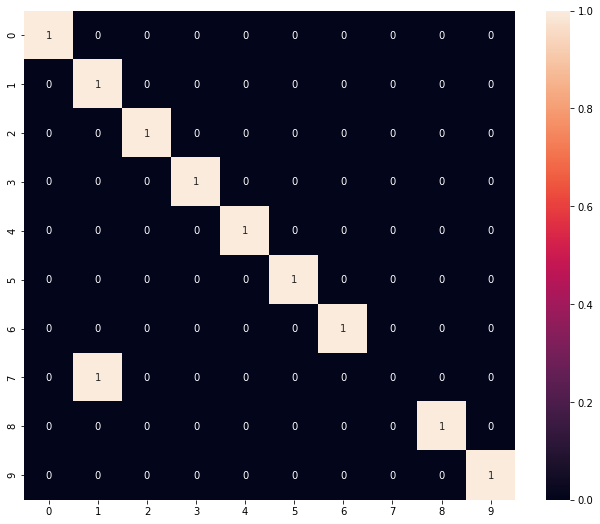

In [56]:
my_results = my_model1.predict(my_x)
print(my_results.argmax(axis=-1))
target    = np.array([0,1,2,3,4,5,6,7,8,9])
show_cm_mnist(target, my_results, range(10))

Pour conclure avec les images perso il faudrait bien sûr faire des tests avec un plus grand nombre d'images....

Les résultats obtenus suggèrent :
- que le réseau à 1 couche cachée et à plusieurs couches cachées donnent des performances proches pour les images MNIST,
- que l'apprentissage d'un réseau dense reste assez sensible à la nature du jeu de données : les images de chiffres 'maison' ne ressemblent pas tout à fait à celles de la banque MNIST, d'où des erreurs de classification avec un simple réseau dense.

# La suite....

Pour aller au-delà des 98% de reconnaissance des chiffres MNIST et une meilleure reconnaissance des 'images perso', il faut passer à une architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le notebook `TP3_MNIST_convol.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [57]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [58]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [59]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [60]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>